# Лабораторная работа: Интерполяция рациональными функциями Беррута




## Необходимо реалиозовать метод Беррута

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

def berrut_rational_interpolation(x, x_nodes, y_nodes):
    """
    Интерполяция рациональной функцией Беррута.
    Использует веса w_k = (-1)^k для равномерных узлов.
    """
    n = len(x_nodes)
    x = np.asarray(x)
    scalar_input = False
    if x.ndim == 0:
        x = x[None]
        scalar_input = True
        
    numerator = np.zeros_like(x, dtype=float)
    denominator = np.zeros_like(x, dtype=float)
    
    for i in range(n):
        # Веса Беррута: (-1)^i
        w_i = (-1)**i
        
        diff = x - x_nodes[i]
        
        with np.errstate(divide='ignore', invalid='ignore'):
            term = w_i / diff
            
        term[~np.isfinite(term)] = 0.0
        
        numerator += term * y_nodes[i]
        denominator += term
        
    with np.errstate(divide='ignore', invalid='ignore'):
        result = numerator / denominator
    
    for i in range(n):
        mask = np.abs(x - x_nodes[i]) < 1e-14
        result[mask] = y_nodes[i]
        
    if scalar_input:
        return result[0]
    return result

def lagrange_interpolation(x, x_nodes, y_nodes):
    """
    Интерполяция полиномом Лагранжа (используем барицентрическую форму для устойчивости).
    """
    poly = BarycentricInterpolator(x_nodes, y_nodes)
    return poly(x)

## 1: Феномен Рунге
Провести сравнительный анализ интерполяции функции Рунге методами Беррута и полинома Лагранжа. Построить графики интерполяционных приближений и исходной функции, сравнить поведение методов, а также сделать выводы о качестве аппроксимации.

Необходимо:

1. Построить интерполяционные полиномы Лагранжа и Беррута для функции Рунге на выбранных узлах.

2. Визуализировать оригинальную функцию и интерполяционные результаты обоих методов.


3. Сделать выводы о преимуществах и недостатках каждого метода на данной задаче.

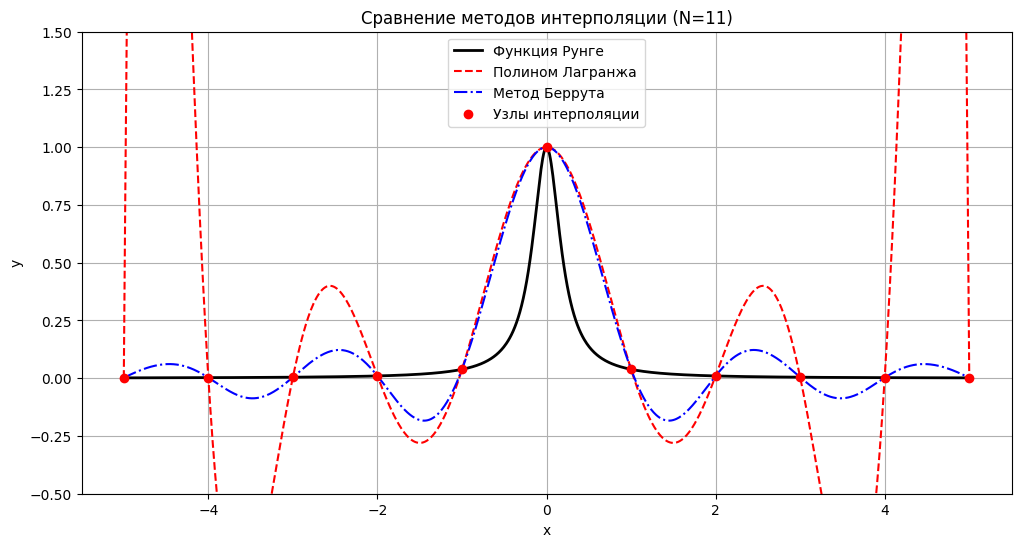

In [ ]:
def runge_func(x):
    return 1.0 / (1.0 + 25*x**2)

x_min, x_max = -5, 5
num_nodes = 11  # Количество узлов интерполяции

x_nodes = np.linspace(x_min, x_max, num_nodes)
y_nodes = runge_func(x_nodes)

x_plot = np.linspace(x_min, x_max, 1000)
y_true = runge_func(x_plot)

# Интерполяция
y_berrut = berrut_rational_interpolation(x_plot, x_nodes, y_nodes)
y_lagrange = lagrange_interpolation(x_plot, x_nodes, y_nodes)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(x_plot, y_true, 'k-', label='Функция Рунге', linewidth=2)
plt.plot(x_plot, y_lagrange, 'r--', label='Полином Лагранжа')
plt.plot(x_plot, y_berrut, 'b-.', label='Метод Беррута')
plt.scatter(x_nodes, y_nodes, color='red', zorder=5, label='Узлы интерполяции')

plt.title(f'Сравнение методов интерполяции (N={num_nodes})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-0.5, 1.5) 
plt.show()

## 2: Анализ ошибок
Для полученных интерполяционных результатов (Беррута и Лагранжа) на функции Рунге вычислить следующие показатели точности:

1. Средняя абсолютная ошибка (Mean Absolute Error, MAE)

2. Максимальная абсолютная ошибка

3. Среднеквадратичная ошибка (Root Mean Squared Error, RMSE)

In [15]:
def calculate_errors(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    max_error = np.max(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return mae, max_error, rmse

mae_l, max_l, rmse_l = calculate_errors(y_true, y_lagrange)
mae_b, max_b, rmse_b = calculate_errors(y_true, y_berrut)

print("Ошибки интерполяции (Полином Лагранжа):")
print(f"MAE: {mae_l:.6f}")
print(f"Max Error: {max_l:.6f}")
print(f"RMSE: {rmse_l:.6f}")
print("-" * 30)
print("Ошибки интерполяции (Метод Беррута):")
print(f"MAE: {mae_b:.6f}")
print(f"Max Error: {max_b:.6f}")
print(f"RMSE: {rmse_b:.6f}")

Ошибки интерполяции (Полином Лагранжа):
MAE: 0.957209
Max Error: 5.791054
RMSE: 1.768146
------------------------------
Ошибки интерполяции (Метод Беррута):
MAE: 0.125420
Max Error: 0.570127
RMSE: 0.188155


## 3: Тестирование интерполяционных методов на различных функциях
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на нескольких тестовых функциях. Для каждого метода построить интерполяционные полиномы, визуализировать результаты и оценить качество аппроксимации.
Рекомендуемые функции для тестирования:
### Список функций для тестирования

- **Функция 1:**  
  $$ f_1(x) = \sin(x), \quad x \in [-\pi, \pi] $$

- **Функция 2:**  
  $$ f_2(x) = e^x, \quad x \in [-2, 2] $$

- **Функция 3:**  
  $$ f_3(x) = x^2 \sin(x), \quad x \in [-5, 5] $$

- **Функция 4:**  
  $$ f_4(x) = |x|, \quad x \in [-3, 3] $$

- **Функция 5:**  
  $$ f_5(x) = \sin(10x) e^{-x^2}, \quad x \in [-3, 3] $$


Необходимо выполнить
1. Провести интерполяцию для каждой функции на равномерной и неравномерной сетке узлов.

2. Построить графики исходных функций и интерполяционных полиномов для обоих методов.

3. Сравнить визуально и численно (по погрешности) результаты для методов Лагранжа и Беррута.



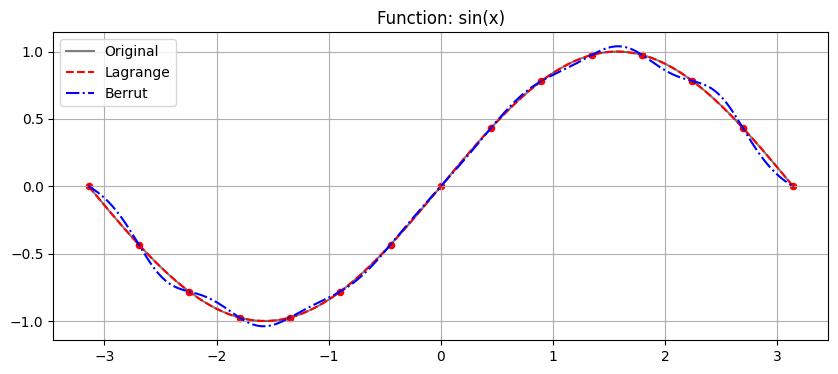

sin(x) -> RMSE Lagrange: 8.95e-09, RMSE Berrut: 3.12e-02


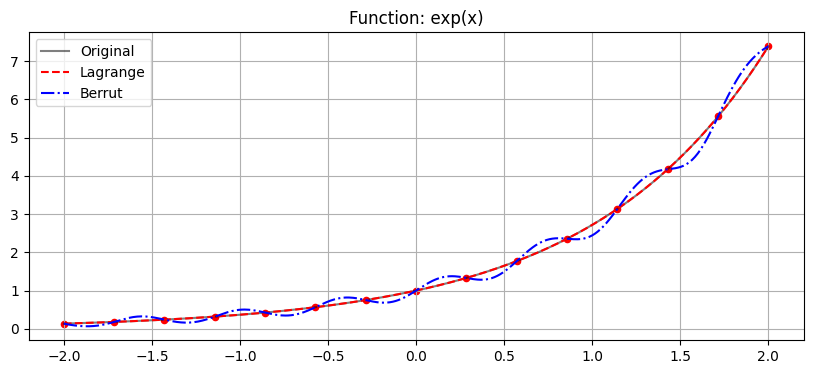

exp(x) -> RMSE Lagrange: 1.25e-11, RMSE Berrut: 1.57e-01


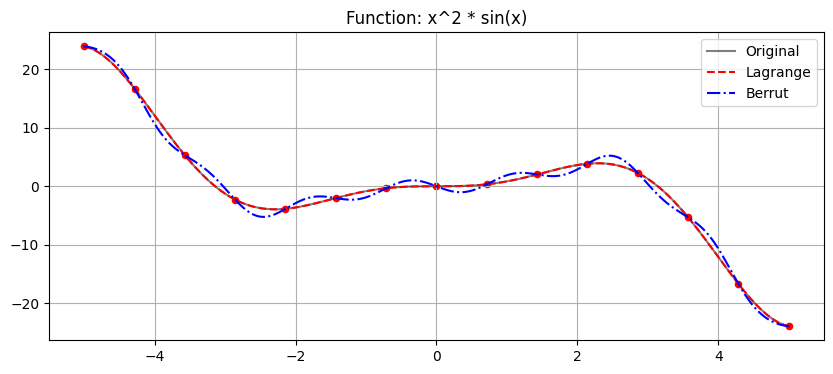

x^2 * sin(x) -> RMSE Lagrange: 1.46e-03, RMSE Berrut: 8.93e-01


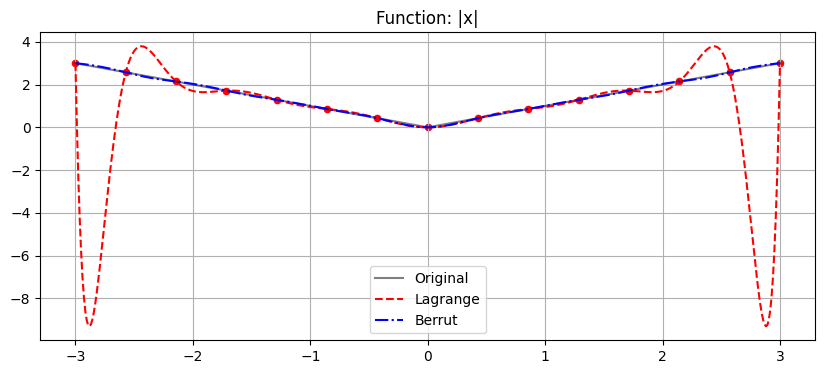

|x| -> RMSE Lagrange: 3.00e+00, RMSE Berrut: 2.95e-02


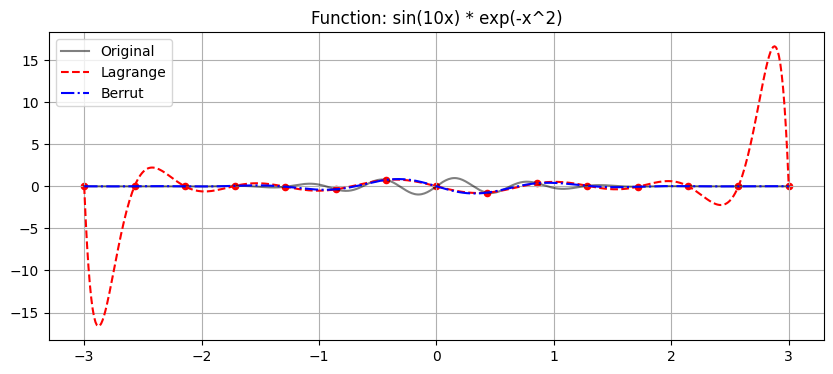

sin(10x) * exp(-x^2) -> RMSE Lagrange: 4.18e+00, RMSE Berrut: 4.55e-01


In [ ]:
test_functions = [
    (lambda x: np.sin(x), -np.pi, np.pi, "sin(x)"),
    (lambda x: np.exp(x), -2, 2, "exp(x)"),
    (lambda x: x**2 * np.sin(x), -5, 5, "x^2 * sin(x)"),
    (lambda x: np.abs(x), -3, 3, "|x|"),
    (lambda x: np.sin(10*x) * np.exp(-x**2), -3, 3, "sin(10x) * exp(-x^2)")
]

num_nodes = 15 # Количество узлов

for func, x_a, x_b, name in test_functions:
    # Равномерная сетка
    x_nodes = np.linspace(x_a, x_b, num_nodes)
    y_nodes = func(x_nodes)
    
    x_plot = np.linspace(x_a, x_b, 500)
    y_true_func = func(x_plot)
    
    y_berrut_func = berrut_rational_interpolation(x_plot, x_nodes, y_nodes)
    y_lagrange_func = lagrange_interpolation(x_plot, x_nodes, y_nodes)
    
    plt.figure(figsize=(10, 4))
    plt.plot(x_plot, y_true_func, 'k-', label='Original', alpha=0.5)
    plt.plot(x_plot, y_lagrange_func, 'r--', label='Lagrange')
    plt.plot(x_plot, y_berrut_func, 'b-.', label='Berrut')
    plt.scatter(x_nodes, y_nodes, c='red', s=20)
    plt.title(f'Function: {name}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Ошибки
    _, _, rmse_l_func = calculate_errors(y_true_func, y_lagrange_func)
    _, _, rmse_b_func = calculate_errors(y_true_func, y_berrut_func)
    print(f"{name} -> RMSE Lagrange: {rmse_l_func:.2e}, RMSE Berrut: {rmse_b_func:.2e}")

## 4: Интерполяция зашумленных данных
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на зашумленных данных. Необходимо построить графики, включающие:

1. График интерполяции, на котором изображены оригинальная функция, зашумленные точки и результаты интерполяции двумя методами.

2. График сравнения ошибок интерполяции каждого метода.

Варианты:
* Вариант 1: равномерные узлы, низкий гауссов шум

* Вариант 2: равномерные узлы, высокий гауссов шум



Ваш вариант: номер по списку % 2

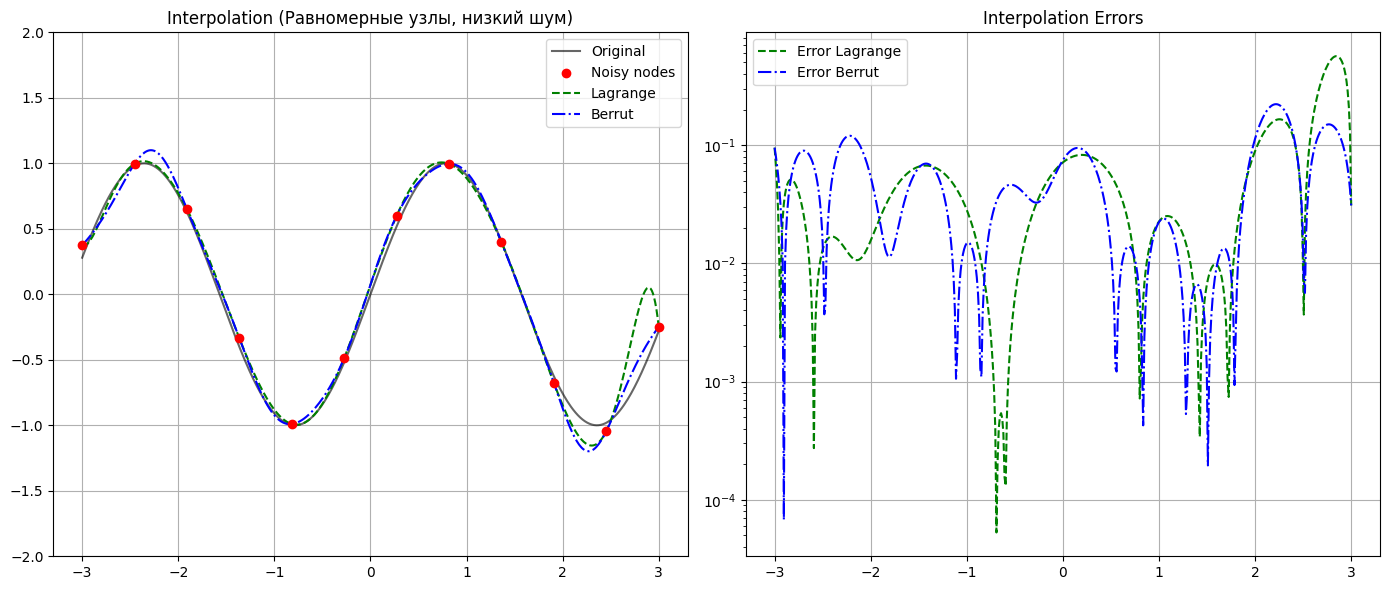

Variant: Равномерные узлы, низкий шум
Lagrange -> MAE: 0.0652, RMSE: 0.1224
Berrut   -> MAE: 0.0546, RMSE: 0.0744


In [ ]:
def f(x):
    return np.sin(2*x)

def generate_data(nodes, noise_level, noise_type='gaussian'):
    y_true = f(nodes)
    if noise_type == 'gaussian':
        noise = np.random.normal(0, noise_level, size=nodes.shape)
    y_noisy = y_true + noise
    return y_true, y_noisy

# Варианты узлов
uniform_nodes = np.linspace(-3, 3, 12)
nonuniform_nodes = np.sort(np.random.uniform(-3, 3, 12))

variants = [
    (uniform_nodes, 0.05, 'gaussian', 'Равномерные узлы, низкий шум'),
    (uniform_nodes, 0.2, 'gaussian', 'Равномерные узлы, высокий шум')
]

selected_variant_idx = 0 
nodes, noise_level, noise_type, desc = variants[selected_variant_idx]

y_true_nodes, y_noisy_nodes = generate_data(nodes, noise_level, noise_type)

# Точки для построения
x_plot = np.linspace(-3, 3, 500)
y_true_plot = f(x_plot)

# Интерполяция по зашумленным данным
y_berrut_noisy = berrut_rational_interpolation(x_plot, nodes, y_noisy_nodes)
y_lagrange_noisy = lagrange_interpolation(x_plot, nodes, y_noisy_nodes)

# График 1: Интерполяция
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x_plot, y_true_plot, 'k-', label='Original', alpha=0.6)
plt.scatter(nodes, y_noisy_nodes, c='red', label='Noisy nodes', zorder=5)
plt.plot(x_plot, y_lagrange_noisy, 'g--', label='Lagrange')
plt.plot(x_plot, y_berrut_noisy, 'b-.', label='Berrut')
plt.title(f'Interpolation ({desc})')
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)

# График 2: Ошибки
plt.subplot(1, 2, 2)
plt.plot(x_plot, np.abs(y_true_plot - y_lagrange_noisy), 'g--', label='Error Lagrange')
plt.plot(x_plot, np.abs(y_true_plot - y_berrut_noisy), 'b-.', label='Error Berrut')
plt.title('Interpolation Errors')
plt.yscale('log') 
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод ошибок
mae_l, max_l, rmse_l = calculate_errors(y_true_plot, y_lagrange_noisy)
mae_b, max_b, rmse_b = calculate_errors(y_true_plot, y_berrut_noisy)

print(f"Variant: {desc}")
print(f"Lagrange -> MAE: {mae_l:.4f}, RMSE: {rmse_l:.4f}")
print(f"Berrut   -> MAE: {mae_b:.4f}, RMSE: {rmse_b:.4f}")